In [23]:
import pandas as pd 
import quandl
import math
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
style.use('ggplot')

In [24]:
df = quandl.get('WIKI/GOOGL')
df2 = df
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [25]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
df.head()

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [26]:
forecast = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast].shift(-forecast_out)
print(df.head())
df.tail()

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0,NaN
2018-03-22,1053.15,2.921711,-2.487014,3418154.0,NaN
2018-03-23,1026.55,3.918952,-2.360729,2413517.0,NaN
2018-03-26,1054.09,0.491419,0.332191,3272409.0,NaN
2018-03-27,1006.94,5.720301,-5.353887,2940957.0,NaN


In [27]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)


#print(X[:10])
X_lately = X[-forecast_out:] # value in X except last len(forecast_out) rows as to match with label y
X = X[:-forecast_out] # values for label column will be predicted against these last len(forecast_out) values 


df.dropna(inplace=True)# drop last  len(forecast_out) rows as label is NaN 
print(df.tail())
y = np.array(df['label']) # data y is consistent with X

print(forecast_out)
print(len(X),len(y))
#print("After preprocessing", X[:10])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size = 0.2)

#clf = LinearRegression()
#clf.fit(X_train,y_train)

#with open('reg-stock-training-data.pickle','wb') as f:
#    pickle.dump(clf,f)

# dump trained data into pickle file and use it again and again, so our model will not get trained everytime 

pickle_in = open('reg-stock-training-data.pickle','rb')
clf = pickle.load(pickle_in)    
    
accuracy = clf.score(X_test, y_test)
predicted = clf.predict(X_lately)

print(predicted,'\n',accuracy)

            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2018-01-30     1177.37  0.896914   -0.029718    1792602.0  1094.00
2018-01-31     1182.22  0.346805   -0.134312    1643877.0  1053.15
2018-02-01     1181.59  0.495942    0.476195    2774967.0  1026.55
2018-02-02     1119.20  1.081129   -0.729098    5798880.0  1054.09
2018-02-05     1068.76  4.325574   -2.893850    3742469.0  1006.94
35
3389 3389
[1101.4074668  1072.83967203 1020.51359784 1060.50746592 1072.79724839
 1072.932546   1091.38787948 1110.69282382 1114.11412293 1122.09867973
 1131.58739949 1129.01234183 1148.07531335 1163.69587203 1136.03448527
 1122.18331788 1088.42115668 1102.48787248 1113.60649603 1120.68730224
 1134.3189964  1149.08549849 1180.49902978 1185.28888638 1157.85587429
 1168.15467063 1170.01485045 1153.13213667 1118.45503935 1114.60533352
 1112.44647102 1070.19255426 1042.66603466 1072.49826042 1022.0788597 ] 
 0.9807431828729033

In [37]:
df['PCT_change_predicted'] = (df['label'] - df2['Adj. Open'])/ df2['Adj. Open'] * 100
df['PCT_change_predicted'][-35:]


Date
2018-02-06 05:30:00   NaN
2018-02-07 05:30:00   NaN
2018-02-08 05:30:00   NaN
2018-02-09 05:30:00   NaN
2018-02-10 05:30:00   NaN
2018-02-11 05:30:00   NaN
2018-02-12 05:30:00   NaN
2018-02-13 05:30:00   NaN
2018-02-14 05:30:00   NaN
2018-02-15 05:30:00   NaN
2018-02-16 05:30:00   NaN
2018-02-17 05:30:00   NaN
2018-02-18 05:30:00   NaN
2018-02-19 05:30:00   NaN
2018-02-20 05:30:00   NaN
2018-02-21 05:30:00   NaN
2018-02-22 05:30:00   NaN
2018-02-23 05:30:00   NaN
2018-02-24 05:30:00   NaN
2018-02-25 05:30:00   NaN
2018-02-26 05:30:00   NaN
2018-02-27 05:30:00   NaN
2018-02-28 05:30:00   NaN
2018-03-01 05:30:00   NaN
2018-03-02 05:30:00   NaN
2018-03-03 05:30:00   NaN
2018-03-04 05:30:00   NaN
2018-03-05 05:30:00   NaN
2018-03-06 05:30:00   NaN
2018-03-07 05:30:00   NaN
2018-03-08 05:30:00   NaN
2018-03-09 05:30:00   NaN
2018-03-10 05:30:00   NaN
2018-03-11 05:30:00   NaN
2018-03-12 05:30:00   NaN
Name: PCT_change_predicted, dtype: float64

In [29]:
import datetime
last_date = df.iloc[-1].name
print(last_date)
last_unix = last_date.timestamp()
last_unix

2018-02-05 00:00:00


1517788800.0

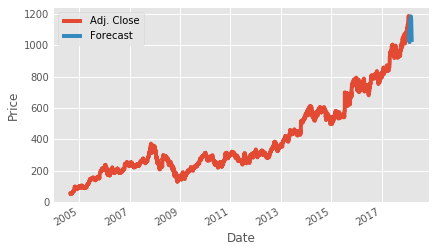

In [30]:
one_day = 86400
next_unix = last_unix + one_day

df['Forecast'] = np.nan

for i in predicted:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) -1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

    

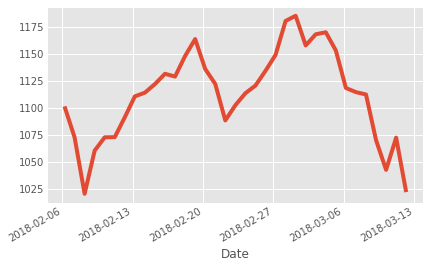

In [31]:
df['Forecast'].plot()

In [32]:
len(df['Forecast'])

3424

In [33]:
df['Forecast'][:100]

Date
2004-08-19   NaN
2004-08-20   NaN
2004-08-23   NaN
2004-08-24   NaN
2004-08-25   NaN
2004-08-26   NaN
2004-08-27   NaN
2004-08-30   NaN
2004-08-31   NaN
2004-09-01   NaN
2004-09-02   NaN
2004-09-03   NaN
2004-09-07   NaN
2004-09-08   NaN
2004-09-09   NaN
2004-09-10   NaN
2004-09-13   NaN
2004-09-14   NaN
2004-09-15   NaN
2004-09-16   NaN
2004-09-17   NaN
2004-09-20   NaN
2004-09-21   NaN
2004-09-22   NaN
2004-09-23   NaN
2004-09-24   NaN
2004-09-27   NaN
2004-09-28   NaN
2004-09-29   NaN
2004-09-30   NaN
              ..
2004-11-29   NaN
2004-11-30   NaN
2004-12-01   NaN
2004-12-02   NaN
2004-12-03   NaN
2004-12-06   NaN
2004-12-07   NaN
2004-12-08   NaN
2004-12-09   NaN
2004-12-10   NaN
2004-12-13   NaN
2004-12-14   NaN
2004-12-15   NaN
2004-12-16   NaN
2004-12-17   NaN
2004-12-20   NaN
2004-12-21   NaN
2004-12-22   NaN
2004-12-23   NaN
2004-12-27   NaN
2004-12-28   NaN
2004-12-29   NaN
2004-12-30   NaN
2004-12-31   NaN
2005-01-03   NaN
2005-01-04   NaN
2005-01-05   NaN
2005-01-0

In [34]:
df['Forecast'][-40:]

Date
2018-01-30 00:00:00            NaN
2018-01-31 00:00:00            NaN
2018-02-01 00:00:00            NaN
2018-02-02 00:00:00            NaN
2018-02-05 00:00:00            NaN
2018-02-06 05:30:00    1101.407467
2018-02-07 05:30:00    1072.839672
2018-02-08 05:30:00    1020.513598
2018-02-09 05:30:00    1060.507466
2018-02-10 05:30:00    1072.797248
2018-02-11 05:30:00    1072.932546
2018-02-12 05:30:00    1091.387879
2018-02-13 05:30:00    1110.692824
2018-02-14 05:30:00    1114.114123
2018-02-15 05:30:00    1122.098680
2018-02-16 05:30:00    1131.587399
2018-02-17 05:30:00    1129.012342
2018-02-18 05:30:00    1148.075313
2018-02-19 05:30:00    1163.695872
2018-02-20 05:30:00    1136.034485
2018-02-21 05:30:00    1122.183318
2018-02-22 05:30:00    1088.421157
2018-02-23 05:30:00    1102.487872
2018-02-24 05:30:00    1113.606496
2018-02-25 05:30:00    1120.687302
2018-02-26 05:30:00    1134.318996
2018-02-27 05:30:00    1149.085498
2018-02-28 05:30:00    1180.499030
2018-03-01 05:3

0.00026014568158168577
R =  0.9997398543184183


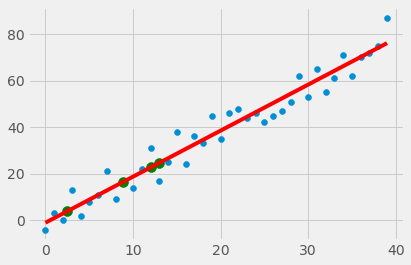

In [35]:
#Implementation of linear regression 
# Plot regression line using formula 

from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

#xs = np.array([1,2,3,4,5,6,7,8,9], dtype = np.float64)
#ys = np.array([3,5,2,7,4,8,11,12,8], dtype = np.float64)  R = 0.91 higher value indicates best fit

#xs = np.array([1,2,3,4,5,6,7,8,9], dtype = np.float64)
#ys = np.array([3,15,2,7,4,18,11,12,8], dtype = np.float64) #R = -0.5625 indicating the worst fit

#xs = np.array([1,2,3,4,5,6,7,8,9], dtype = np.float64)
#ys = np.array([1,4,9,16,25,36,49,64,81], dtype = np.float64) R = 0.859375

#creating dataset xs, ys for diff test cases

def create_dataset(hm, variance, step =2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

def best_fit_line(xs,ys):
    m = ( mean(xs)*mean(ys) - mean(xs*ys) ) / (mean(xs)*mean(xs) - mean(xs*xs))
    b = mean(ys) - m*mean(xs)
    return m,b

def squared_error(y_orig, y_line):
    return sum(y_line - y_orig)**2

def coefficient_of_determination(y_orig, y_line):
    y_mean_line = [mean(y_orig) for y in y_orig] # loop, so that our y_mean_line is compatible or of same  lenght as of y_orig
    squared_error_y_line = squared_error(y_orig, y_line)
    squared_error_y_mean = squared_error(y_orig, y_mean_line)
    print(squared_error_y_line/squared_error_y_mean)
    return 1 - (squared_error_y_line/squared_error_y_mean)


xs, ys = create_dataset(40, 10, 2, correlation = 'pos')



m,b = best_fit_line(xs,ys)

reg_line = [m*x + b for x in xs]

predict_for = [2.5, 12, 8.8, 13]
predicted = [m*i + b for i in predict_for]

r_squared_error = coefficient_of_determination(ys, reg_line)
print("R = ",r_squared_error)

plt.scatter(xs,ys)
plt.plot(xs,reg_line,'r')
plt.scatter(predict_for, predicted, s = 100, color = 'g')
plt.show()

